<a href="https://colab.research.google.com/github/KRollins26/learning_pytorch/blob/main/02_pytorch_classification_exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 02. PyTorch Classification Exercises

The following is a template for 02. PyTorch Classification exercises.

It's only starter code and it's your job to fill in the blanks.

Because of the flexibility of PyTorch, there may be more than one way to answer the question.

Don't worry about trying to be *right* just try writing code that suffices the question.

## Resources
* These exercises are based on [notebook 02 of the learn PyTorch course](https://www.learnpytorch.io/02_pytorch_classification/).
* You can see one form of [solutions on GitHub](https://github.com/mrdbourke/pytorch-deep-learning/tree/main/extras/solutions) (but try the exercises below yourself first!).

In [ ]:
# Import pytorch and nn
import torch
from torch import nn

# Make device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

# Setup random variables
RANDOM_SEED = 42
NUM_CLASSES = 1
NUM_FEATURES = 2
NUM_SAMPLES = 1000

## 1. Make a binary classification dataset with Scikit-Learn's [`make_moons()`](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html) function.
  * For consistency, the dataset should have 1000 samples and a `random_state=42`.
  * Turn the data into PyTorch tensors.
  * Split the data into training and test sets using `train_test_split` with 80% training and 20% testing.

In [ ]:
# Create a dataset with Scikit-Learn's make_moons()
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=NUM_SAMPLES, shuffle=True, noise=0.20, random_state=RANDOM_SEED)

print(f"First 5 X features:\n{X[:10]}")
print(f"\nFirst 5 y labels:\n{y[:10]}")

First 5 X features:
[[-0.11166654  0.52022374]
 [ 1.14264982 -0.34257734]
 [ 0.79555796 -0.01144231]
 [ 0.11182668 -0.55193153]
 [-0.81646618  0.54399604]
 [ 0.66250998 -0.08435588]
 [ 0.27450961 -0.18990367]
 [-0.11555577  0.53591195]
 [ 1.57236902 -0.33544711]
 [ 0.76398981  0.96235883]]

First 5 y labels:
[1 1 1 1 0 1 1 1 1 0]


In [ ]:
# Turn data into a DataFrame
import pandas as pd
moons_df = pd.DataFrame({"X1": X[:, 0],
                         "X2": X[:, 1],
                         "label": y})
moons_df.head(10)


,X1,X2,label
0,-0.111667,0.520224,1
1,1.142650,-0.342577,1
2,0.795558,-0.011442,1
3,0.111827,-0.551932,1
4,-0.816466,0.543996,0
5,0.662510,-0.084356,1
6,0.274510,-0.189904,1
7,-0.115556,0.535912,1
8,1.572369,-0.335447,1
9,0.763990,0.962359,0


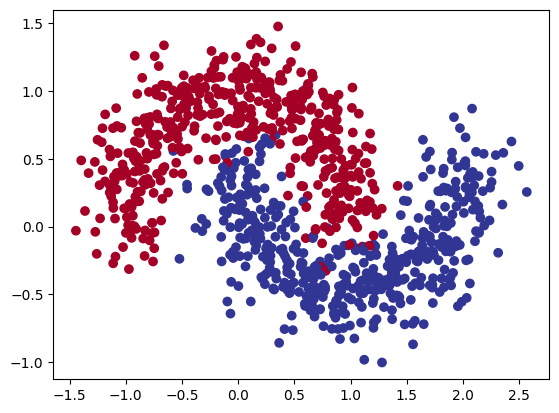

In [ ]:
# Visualize the data on a scatter plot
import matplotlib.pyplot as plt
plt.scatter(x=X[:, 0],
            y=X[:, 1],
            c=y,
            cmap=plt.cm.RdYlBu);

In [ ]:
X.shape, y.shape

((1000, 2), (1000,))

In [ ]:
# Turn data into tensors of dtype float
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

# View the first five samples
X[:5], y[:5]


# Split the data into train and test sets (80% train, 20% test)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2, # 20% test, 80% train
                                                    random_state=RANDOM_SEED) # make the random split reproducible

len(X_train), len(X_test), len(y_train), len(y_test)

(800, 200, 800, 200)

## 2. Build a model by subclassing `nn.Module` that incorporates non-linear activation functions and is capable of fitting the data you created in 1.
  * Feel free to use any combination of PyTorch layers (linear and non-linear) you want.

In [ ]:
import torch
from torch import nn

# Inherit from nn.Module to make a model capable of fitting the mooon data
class MoonModelV0(nn.Module):
    def __init__(self, in_features, out_features, hidden_units=8):
        """Initializes all required hyperparameters for a multi-class classification model.

        Args:
            input_features (int): Number of input features to the model.
            out_features (int): Number of output features of the model
              (how many classes there are).
            hidden_units (int): Number of hidden units between layers, default 8.
        """
        super().__init__()
        self.layer1 = nn.Linear(in_features=in_features, out_features=hidden_units)
        self.layer2 = nn.Linear(in_features=hidden_units, out_features=hidden_units)
        self.layer3 = nn.Linear(in_features=hidden_units, out_features=out_features)
        self.relu = nn.ReLU()

    def forward(self, x):
      return self.layer3(self.relu(self.layer2(self.relu((self.layer1(x))))))

model_5 = MoonModelV0(in_features=NUM_FEATURES,
                      out_features=NUM_CLASSES,
                      hidden_units=10).to(device)
print(model_5)

MoonModelV0(
  (layer1): Linear(in_features=2, out_features=10, bias=True)
  (layer2): Linear(in_features=10, out_features=10, bias=True)
  (layer3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)


In [ ]:
model_5.state_dict()

OrderedDict([('layer1.weight',
              tensor([[ 0.5406,  0.5869],
                      [-0.1657,  0.6496],
                      [-0.1549,  0.1427],
                      [-0.3443,  0.4153],
                      [ 0.6233, -0.5188],
                      [ 0.6146,  0.1323],
                      [ 0.5224,  0.0958],
                      [ 0.3410, -0.0998],
                      [ 0.5451,  0.1045],
                      [-0.3301,  0.1802]], device='cuda:0')),
             ('layer1.bias',
              tensor([-0.3258, -0.0829, -0.2872,  0.4691, -0.5582, -0.3260, -0.1997, -0.4252,
                       0.0667, -0.6984], device='cuda:0')),
             ('layer2.weight',
              tensor([[ 0.2856, -0.2686,  0.2441,  0.0526, -0.1027,  0.1954,  0.0493,  0.2555,
                        0.0346, -0.0997],
                      [ 0.0850, -0.0858,  0.1331,  0.2823,  0.1828, -0.1382,  0.1825,  0.0566,
                        0.1606, -0.1927],
                      [-0.3130, -0.1222, 

## 3. Setup a binary classification compatible loss function and optimizer to use when training the model built in 2.

In [ ]:
# Setup loss function
loss_fn = nn.BCEWithLogitsLoss() # sigmoid layer built-in

# Setup optimizer to optimize model's parameters
optimizer = torch.optim.SGD(model_5.parameters(),
                            lr=0.1)

## 4. Create a training and testing loop to fit the model you created in 2 to the data you created in 1.
  * Do a forward pass of the model to see what's coming out in the form of logits, prediction probabilities and labels.
  * To measure model accuray, you can create your own accuracy function or use the accuracy function in [TorchMetrics](https://torchmetrics.readthedocs.io/en/latest/).
  * Train the model for long enough for it to reach over 96% accuracy.
  * The training loop should output progress every 10 epochs of the model's training and test set loss and accuracy.

In [ ]:
# What's coming out of our model?
model_5(X_train.to(device))[:10]

tensor([[0.0027],
        [0.0080],
        [0.0116],
        [0.0191],
        [0.0273],
        [0.0208],
        [0.0236],
        [0.0245],
        [0.0318],
        [0.0068]], device='cuda:0', grad_fn=<SliceBackward0>)

In [ ]:
y_test[:10]

tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.])

In [ ]:
# How many elements in a single prediction sample?
model_5(X_train.to(device))[0].shape, NUM_CLASSES

(torch.Size([1]), 1)

In [ ]:
# logits (raw outputs of model)
y_logits = model_5(X_train.to(device).squeeze())
print(f"Logits: \n{y_logits[:10]}")

# Prediction probabilities
# Sigmoid is used for binary classification methods where we only have 2 classes, while SoftMax applies to multiclass problems. In fact, the SoftMax function is an extension of the Sigmoid function.
# Sigmoid receives just one input and only outputs a single number that represents the probability of belonging to class1 (remember that we only have 2 classes so the probability of belonging to class2 = 1 - P(class1)).
# While on the other hand SoftMax is vectorized, meaning that takes a vector with the same number of entries as classes we have and outputs another vector where each component represents the probability of belonging to that class.
# https://towardsdatascience.com/sigmoid-and-softmax-functions-in-5-minutes-f516c80ea1f9#:~:text=Sigmoid%20is%20used%20for%20binary,extension%20of%20the%20Sigmoid%20function.

y_pred_probs = torch.sigmoid(y_logits)
print(f"Pred probs:\n {y_pred_probs[:5]}")

# Prediction labels
print(f"Pred labels:\n {torch.round(y_pred_probs[:5])}")



Logits: 
tensor([[0.0027],
        [0.0080],
        [0.0116],
        [0.0191],
        [0.0273],
        [0.0208],
        [0.0236],
        [0.0245],
        [0.0318],
        [0.0068]], device='cuda:0', grad_fn=<SliceBackward0>)
Pred probs:
 tensor([[0.5007],
        [0.5020],
        [0.5029],
        [0.5048],
        [0.5068]], device='cuda:0', grad_fn=<SliceBackward0>)
Pred labels:
 tensor([[1.],
        [1.],
        [1.],
        [1.],
        [1.]], device='cuda:0', grad_fn=<RoundBackward0>)


In [ ]:
# Let's calculuate the accuracy using accuracy from TorchMetrics
!pip -q install torchmetrics # Colab doesn't come with torchmetrics
from torchmetrics import Accuracy

## TODO: Uncomment this code to use the Accuracy function
acc_fn = Accuracy(task="multiclass", num_classes=2).to(device) # send accuracy function to device
acc_fn

MulticlassAccuracy()

In [ ]:
torch.manual_seed(RANDOM_SEED)

# Setup epochs
epochs = 1000

# Send data to the device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

# Loop through the data
for epoch in range(epochs):
  ### Training
    model_5.train()

  # 1. Forward pass (logits output)
    y_logits = model_5(X_train).squeeze() # squeeze to remove extra `1` dimensions, this won't work unless model and data are on same device

  # Turn logits into prediction probabilities
  # Turn prediction probabilities into prediction labels
    y_pred = torch.round(torch.sigmoid(y_logits)) # turn logits -> pred probs -> pred labls

  # 2. Calculaute the loss
    loss = loss_fn(y_logits, y_train) # loss = compare model raw outputs to desired model outputs

  # Calculate the accuracy
    acc = acc_fn(y_pred, y_train.int()) # the accuracy function needs to compare pred labels (not logits) with actual labels

  # 3. Zero the gradients
    optimizer.zero_grad()

  # 4. Loss backward (perform backpropagation) - https://brilliant.org/wiki/backpropagation/#:~:text=Backpropagation%2C%20short%20for%20%22backward%20propagation,to%20the%20neural%20network's%20weights.
    loss.backward()
  # 5. Step the optimizer (gradient descent) - https://towardsdatascience.com/gradient-descent-algorithm-a-deep-dive-cf04e8115f21#:~:text=Gradient%20descent%20(GD)%20is%20an,e.g.%20in%20a%20linear%20regression)
    optimizer.step()

  ### Testing
    model_5.eval()
    with torch.inference_mode():
        # 1. Forward pass
        test_logits = model_5(X_test).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits))
        # 2. Caculate loss/accuracy
        test_loss = loss_fn(test_logits, y_test)
        test_acc = acc_fn(y_test, test_pred)

  # Print out what's happening every 100 epochs
        if epoch % 10 == 0:
          print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc*100:.2f}% | Test loss: {test_loss:.5f}, Test acc: {test_acc*100:.2f}%")


Epoch: 0 | Loss: 0.69494, Accuracy: 39.88% | Test loss: 0.69399, Test acc: 50.50%
Epoch: 10 | Loss: 0.68237, Accuracy: 73.12% | Test loss: 0.68236, Test acc: 71.50%
Epoch: 20 | Loss: 0.66850, Accuracy: 78.50% | Test loss: 0.66973, Test acc: 74.00%
Epoch: 30 | Loss: 0.65194, Accuracy: 77.50% | Test loss: 0.65445, Test acc: 71.50%
Epoch: 40 | Loss: 0.62889, Accuracy: 75.75% | Test loss: 0.63283, Test acc: 69.00%
Epoch: 50 | Loss: 0.59775, Accuracy: 75.50% | Test loss: 0.60371, Test acc: 70.50%
Epoch: 60 | Loss: 0.55984, Accuracy: 76.38% | Test loss: 0.56837, Test acc: 74.00%
Epoch: 70 | Loss: 0.51752, Accuracy: 77.38% | Test loss: 0.52858, Test acc: 74.50%
Epoch: 80 | Loss: 0.47481, Accuracy: 78.25% | Test loss: 0.48825, Test acc: 74.50%
Epoch: 90 | Loss: 0.43699, Accuracy: 79.88% | Test loss: 0.45186, Test acc: 75.50%
Epoch: 100 | Loss: 0.40633, Accuracy: 80.62% | Test loss: 0.42149, Test acc: 77.50%
Epoch: 110 | Loss: 0.38238, Accuracy: 81.62% | Test loss: 0.39661, Test acc: 79.50%
Epo

## 5. Make predictions with your trained model and plot them using the `plot_decision_boundary()` function created in this notebook.

In [ ]:
# Plot the model predictions
import numpy as np

def plot_decision_boundary(model, X, y):

    # Put everything to CPU (works better with NumPy + Matplotlib)
    model.to("cpu")
    X, y = X.to("cpu"), y.to("cpu")

    # Source - https://madewithml.com/courses/foundations/neural-networks/
    # (with modifications)
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 101),
                         np.linspace(y_min, y_max, 101))

    # Make features
    X_to_pred_on = torch.from_numpy(np.column_stack((xx.ravel(), yy.ravel()))).float()

    # Make predictions
    model.eval()
    with torch.inference_mode():
        y_logits = model(X_to_pred_on)

    # Test for multi-class or binary and adjust logits to prediction labels
    if len(torch.unique(y)) > 2:
        y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1) # mutli-class
    else:
        y_pred = torch.round(torch.sigmoid(y_logits)) # binary

    # Reshape preds and plot
    y_pred = y_pred.reshape(xx.shape).detach().numpy()
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

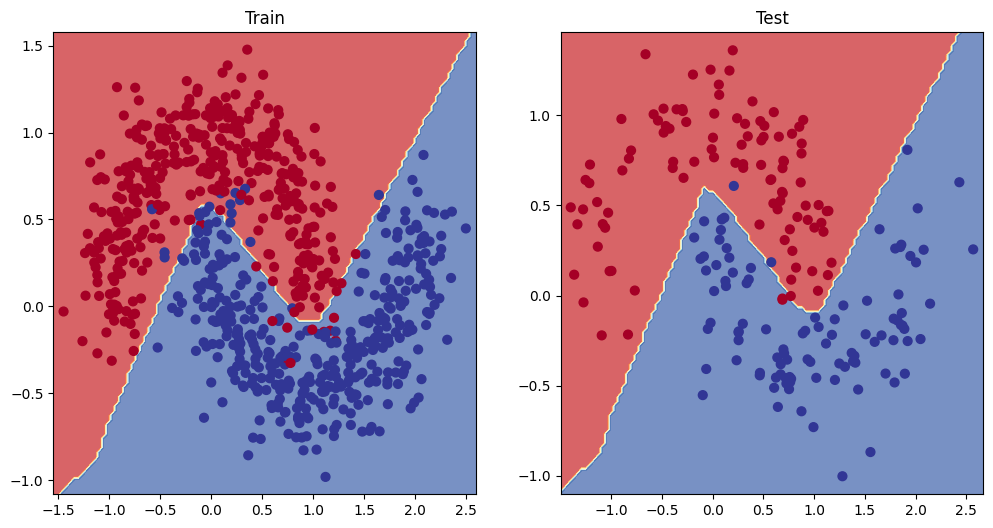

In [ ]:
# Plot decision boundaries for training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_5, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_5, X_test, y_test)

## 6. Replicate the Tanh (hyperbolic tangent) activation function in pure PyTorch.
  * Feel free to reference the [ML cheatsheet website](https://ml-cheatsheet.readthedocs.io/en/latest/activation_functions.html#tanh) for the formula.

In [ ]:
# Create a toy tensor (similar to the data going into our model(s))
A = torch.arange(-10, 10, 1, dtype=torch.float32)
A

tensor([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,   1.,
          2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.])

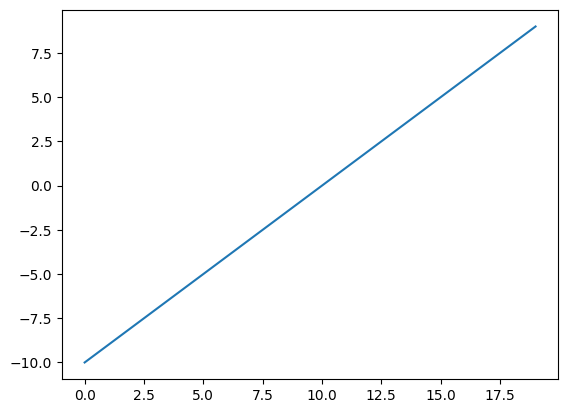

In [ ]:
# Visualize the toy tensor
plt.plot(A);

In [ ]:
# Test torch.tanh() on the tensor and plot it
def tanh(z):
	return (np.exp(z) - np.exp(-z)) / (np.exp(z) + np.exp(-z))


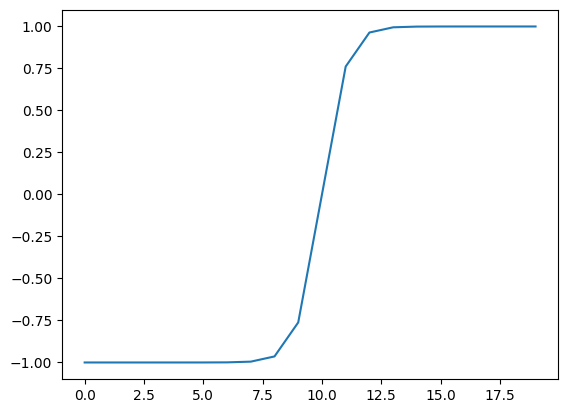

In [ ]:
# Replicate torch.tanh() and plot it
plt.plot(tanh(A));

In [ ]:
def tanh_prime(z):
	return 1 - np.power(tanh(z), 2)

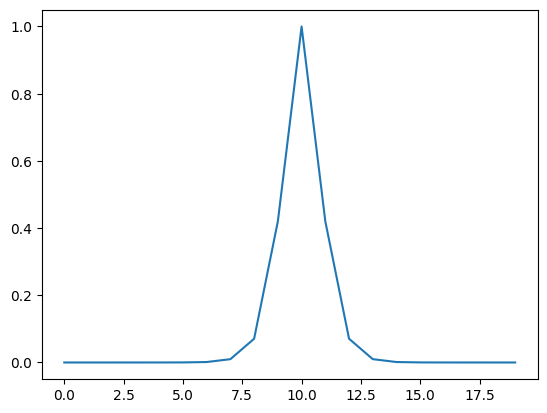

In [ ]:
# Replicate torch.tanh() and plot it
plt.plot(tanh_prime(A));

## 7. Create a multi-class dataset using the [spirals data creation function from CS231n](https://cs231n.github.io/neural-networks-case-study/) (see below for the code).
  * Split the data into training and test sets (80% train, 20% test) as well as turn it into PyTorch tensors.
  * Construct a model capable of fitting the data (you may need a combination of linear and non-linear layers).
  * Build a loss function and optimizer capable of handling multi-class data (optional extension: use the Adam optimizer instead of SGD, you may have to experiment with different values of the learning rate to get it working).
  * Make a training and testing loop for the multi-class data and train a model on it to reach over 95% testing accuracy (you can use any accuracy measuring function here that you like) - 1000 epochs should be plenty.
  * Plot the decision boundaries on the spirals dataset from your model predictions, the `plot_decision_boundary()` function should work for this dataset too.

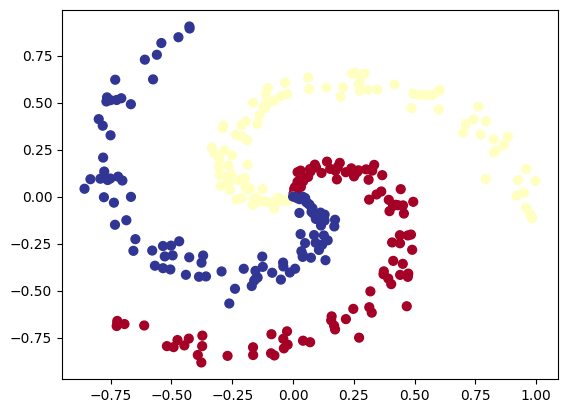

In [ ]:
# Code for creating a spiral dataset from CS231n
import numpy as np
import matplotlib.pyplot as plt
RANDOM_SEED1 = 42
np.random.seed(RANDOM_SEED)
N = 100 # number of points per class
D = 2 # dimensionality
K = 3 # number of classes
X = np.zeros((N*K,D)) # data matrix (each row = single example)
y = np.zeros(N*K, dtype='uint8') # class labels
for j in range(K):
  ix = range(N*j,N*(j+1))
  r = np.linspace(0.0,1,N) # radius
  t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
  X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
  y[ix] = j
# lets visualize the data
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
plt.show()

In [ ]:
spiral_df = pd.DataFrame({"X1": X[:, 0],
                         "X2": X[:, 1],
                         "label": y})
spiral_df.head(10)

,X1,X2,label
0,0.000000,0.000000,0
1,0.000129,0.010100,0
2,0.004218,0.019757,0
3,0.012517,0.027597,0
4,0.004628,0.040138,0
5,0.007807,0.049898,0
6,0.032104,0.051405,0
7,0.029881,0.064083,0
8,0.018370,0.078692,0
9,0.041346,0.080963,0


In [ ]:
X.shape, y.shape

((300, 2), (300,))

In [ ]:
# Turn data into tensors
import torch
X = torch.from_numpy(X).type(torch.float) # features as float32
y = torch.from_numpy(y).type(torch.LongTensor) # labels need to be of type long

# Create train and test splits
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2, # 20% test, 80% train
                                                    random_state=RANDOM_SEED1) # make the random split reproducible

len(X_train), len(X_test), len(y_train), len(y_test)

(240, 60, 240, 60)

In [ ]:
# Let's calculuate the accuracy for when we fit our model
!pip -q install torchmetrics # colab doesn't come with torchmetrics
from torchmetrics import Accuracy

## TODO: uncomment the two lines below to send the accuracy function to the device
acc_fn = Accuracy(task="multiclass", num_classes=4).to(device)
acc_fn

MulticlassAccuracy()

In [ ]:
# Prepare device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"

# Create model by subclassing nn.Module

# Inherit from nn.Module to make a model capable of fitting the spiral data
class SpiralModelV0(nn.Module):
    def __init__(self, in_features, out_features, hidden_units=8):
        """Initializes all required hyperparameters for a multi-class classification model.

        Args:
            input_features (int): Number of input features to the model.
            out_features (int): Number of output features of the model
              (how many classes there are).
            hidden_units (int): Number of hidden units between layers, default 8.
        """
        super().__init__()
        self.layer1 = nn.Linear(in_features=in_features, out_features=hidden_units)
        self.layer2 = nn.Linear(in_features=hidden_units, out_features=hidden_units)
        self.layer3 = nn.Linear(in_features=hidden_units, out_features=out_features)
        self.relu = nn.ReLU()

    def forward(self, x):
      return self.layer3(self.relu(self.layer2(self.relu((self.layer1(x))))))

# Instantiate model and send it to device

model_6 = SpiralModelV0(in_features= 2,
                      out_features= 3,
                      hidden_units=10).to(device)
print(model_6)


SpiralModelV0(
  (layer1): Linear(in_features=2, out_features=10, bias=True)
  (layer2): Linear(in_features=10, out_features=10, bias=True)
  (layer3): Linear(in_features=10, out_features=3, bias=True)
  (relu): ReLU()
)


In [ ]:
# What's coming out of our model?
model_6(X_train.to(device))[:10]

tensor([[-0.2160, -0.0600,  0.2256],
        [-0.2020, -0.0530,  0.2257],
        [-0.2223, -0.0604,  0.2384],
        [-0.2174, -0.0555,  0.2826],
        [-0.2201, -0.0502,  0.2792],
        [-0.2195, -0.0565,  0.2457],
        [-0.2212, -0.0581,  0.2440],
        [-0.2251, -0.0631,  0.2354],
        [-0.2116, -0.0548,  0.2336],
        [-0.2170, -0.0552,  0.2842]], device='cuda:0',
       grad_fn=<SliceBackward0>)

In [ ]:
model_6.state_dict()

OrderedDict([('layer1.weight',
              tensor([[ 0.5406,  0.5869],
                      [-0.1657,  0.6496],
                      [-0.1549,  0.1427],
                      [-0.3443,  0.4153],
                      [ 0.6233, -0.5188],
                      [ 0.6146,  0.1323],
                      [ 0.5224,  0.0958],
                      [ 0.3410, -0.0998],
                      [ 0.5451,  0.1045],
                      [-0.3301,  0.1802]], device='cuda:0')),
             ('layer1.bias',
              tensor([-0.3258, -0.0829, -0.2872,  0.4691, -0.5582, -0.3260, -0.1997, -0.4252,
                       0.0667, -0.6984], device='cuda:0')),
             ('layer2.weight',
              tensor([[ 0.2856, -0.2686,  0.2441,  0.0526, -0.1027,  0.1954,  0.0493,  0.2555,
                        0.0346, -0.0997],
                      [ 0.0850, -0.0858,  0.1331,  0.2823,  0.1828, -0.1382,  0.1825,  0.0566,
                        0.1606, -0.1927],
                      [-0.3130, -0.1222, 

In [ ]:
# logits (raw outputs of model)
y_logits = model_6(X_train.to(device).squeeze())
print(f"Logits: \n{y_logits[:10]}")

# Prediction probabilities
# Sigmoid is used for binary classification methods where we only have 2 classes, while SoftMax applies to multiclass problems. In fact, the SoftMax function is an extension of the Sigmoid function.
# Sigmoid receives just one input and only outputs a single number that represents the probability of belonging to class1 (remember that we only have 2 classes so the probability of belonging to class2 = 1 - P(class1)).
# While on the other hand SoftMax is vectorized, meaning that takes a vector with the same number of entries as classes we have and outputs another vector where each component represents the probability of belonging to that class.
# https://towardsdatascience.com/sigmoid-and-softmax-functions-in-5-minutes-f516c80ea1f9#:~:text=Sigmoid%20is%20used%20for%20binary,extension%20of%20the%20Sigmoid%20function.

y_pred_probs = torch.softmax(y_logits, dim=1)
print(f"Pred probs:\n {y_pred_probs[:5]}")

# Prediction labels
print(f"Pred labels:\n {torch.round(y_pred_probs[:5])}")



Logits: 
tensor([[-0.2160, -0.0600,  0.2256],
        [-0.2020, -0.0530,  0.2257],
        [-0.2223, -0.0604,  0.2384],
        [-0.2174, -0.0555,  0.2826],
        [-0.2201, -0.0502,  0.2792],
        [-0.2195, -0.0565,  0.2457],
        [-0.2212, -0.0581,  0.2440],
        [-0.2251, -0.0631,  0.2354],
        [-0.2116, -0.0548,  0.2336],
        [-0.2170, -0.0552,  0.2842]], device='cuda:0',
       grad_fn=<SliceBackward0>)
Pred probs:
 tensor([[0.2685, 0.3139, 0.4176],
        [0.2707, 0.3142, 0.4151],
        [0.2659, 0.3126, 0.4215],
        [0.2615, 0.3074, 0.4311],
        [0.2609, 0.3092, 0.4299]], device='cuda:0', grad_fn=<SliceBackward0>)
Pred labels:
 tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]], device='cuda:0', grad_fn=<RoundBackward0>)


In [ ]:
# Setup loss function and optimizer
# Create loss and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model_6.parameters(),
                            lr=0.1)

In [ ]:
# Fit the model
torch.manual_seed(42)

# Set number of epochs
epochs = 1000

# Put data to target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for epoch in range(epochs):
    ### Training
    model_6.train()

    # 1. Forward pass
    y_logits = model_6(X_train) # model outputs raw logits
    y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1) # go from logits -> prediction probabilities -> prediction labels

    # print(y_logits)
    # 2. Calculate loss and accuracy
    loss = loss_fn(y_logits, y_train)
    acc = acc_fn(y_train, y_pred)

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backwards
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    ### Testing
    model_6.eval()
    with torch.inference_mode():
      # 1. Forward pass
      test_logits = model_6(X_test)
      test_pred = torch.softmax(test_logits, dim=1).argmax(dim=1)
      # 2. Calculate test loss and accuracy
      test_loss = loss_fn(test_logits, y_test)
      test_acc = acc_fn(y_test, test_pred)

    # Print out what's happening
    if epoch % 10 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Acc: {acc*100:.2f}% | Test Loss: {test_loss:.5f}, Test Acc: {test_acc*100:.2f}%")


Epoch: 0 | Loss: 1.11747, Acc: 32.50% | Test Loss: 1.10989, Test Acc: 36.67%
Epoch: 10 | Loss: 1.10438, Acc: 32.50% | Test Loss: 1.10255, Test Acc: 36.67%
Epoch: 20 | Loss: 1.09863, Acc: 32.50% | Test Loss: 1.09994, Test Acc: 36.67%
Epoch: 30 | Loss: 1.09559, Acc: 32.50% | Test Loss: 1.09872, Test Acc: 36.67%
Epoch: 40 | Loss: 1.09367, Acc: 29.17% | Test Loss: 1.09791, Test Acc: 25.00%
Epoch: 50 | Loss: 1.09187, Acc: 35.00% | Test Loss: 1.09668, Test Acc: 26.67%
Epoch: 60 | Loss: 1.09010, Acc: 35.00% | Test Loss: 1.09525, Test Acc: 26.67%
Epoch: 70 | Loss: 1.08829, Acc: 35.00% | Test Loss: 1.09362, Test Acc: 26.67%
Epoch: 80 | Loss: 1.08632, Acc: 39.58% | Test Loss: 1.09173, Test Acc: 31.67%
Epoch: 90 | Loss: 1.08403, Acc: 43.33% | Test Loss: 1.08947, Test Acc: 38.33%
Epoch: 100 | Loss: 1.08143, Acc: 45.42% | Test Loss: 1.08688, Test Acc: 40.00%
Epoch: 110 | Loss: 1.07842, Acc: 47.08% | Test Loss: 1.08385, Test Acc: 41.67%
Epoch: 120 | Loss: 1.07492, Acc: 47.08% | Test Loss: 1.08033, T

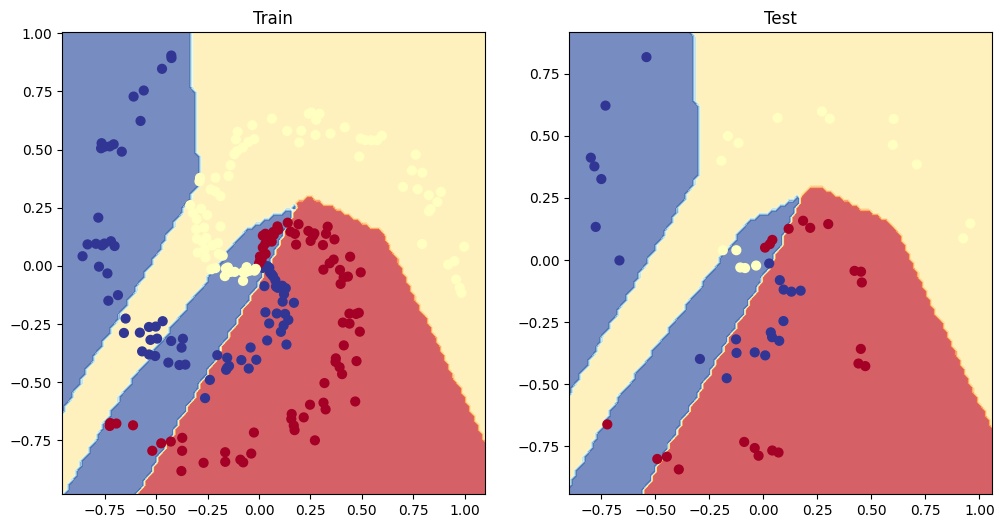

In [ ]:
# Plot decision boundaries for training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_6, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_6, X_test, y_test)